<h1>Questions I wanted to ask</h1>
    <body>
    1. What is the distribution of data scientists' work experience levels?<br>
    2. How does the salary of data scientists vary based on their experience level?<br>
    3. What are the most common job titles for data scientists?<br>
    4. What is the average salary of data scientists?<br>
    5. What is the currency used for reporting salaries in the CSV?<br>
    6. What is the salary range in USD for data scientists in the dataset?<br>
    7. What is the geographical distribution of data scientists' residence?<br>
    8. Based on title, what job has the highest salary?<br>
    9. The distribution of job titles in analysis fields?<br>
    10. How does company size vary among employers of data scientists?<br>
    </body>

In [106]:
#imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [107]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


<h2>What is the distribution of data scientists' work experience levels</h2>

experience_level
SE    0.670040
MI    0.214381
EN    0.085220
EX    0.030360
Name: count, dtype: float64

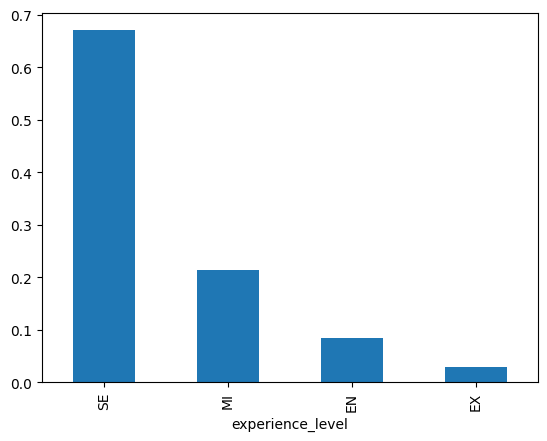

In [108]:
experience = df['experience_level'].value_counts()
relative_freq = experience/experience.sum()
relative_freq.plot(kind='bar')
relative_freq

<h2>How does the salary of data scientists vary based on their experience level?</h2>

<Axes: xlabel='experience_level'>

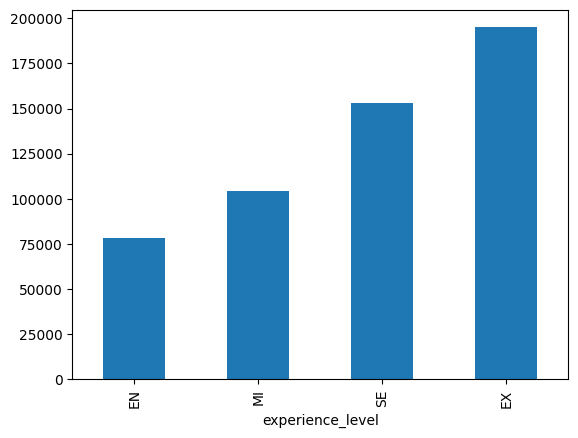

In [109]:
salaryvsexperience = df[['experience_level', 'salary_in_usd']]
salaryvsexperience = salaryvsexperience.groupby('experience_level')['salary_in_usd'].mean()
salaryvsexperience
salaryvsexperience.sort_values().plot(kind='bar')

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

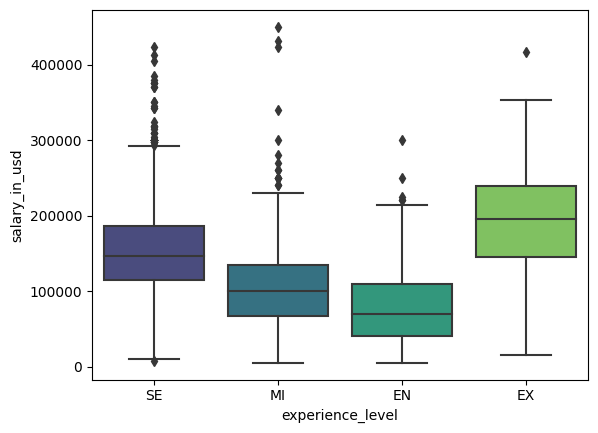

In [129]:
sns.boxplot(x='experience_level', y='salary_in_usd', data=df,palette='viridis')

<h2>What are the most common job titles for data scientists?</h2>

In [111]:
df['job_title'].value_counts().head()

job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Name: count, dtype: int64

<h2>What is the average salary of data scientists?</h2>

In [112]:
df['salary'].mean() #all data science jobs

190695.57177097205

In [113]:
data = df[df['job_title'] == 'Data Scientist']  #extract all data scientist!
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3741,2020,MI,FT,Data Scientist,118000,USD,118000,US,100,US,M
3742,2020,MI,FT,Data Scientist,138350,USD,138350,US,100,US,M
3746,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L


In [114]:
'The average data scientist makes '+ str(round(data['salary'].mean(), 2))

'The average data scientist makes 239073.48'

<h2>What is the currency used for reporting salaries in the CSV?</h2>

salary_currency
USD    0.858589
EUR    0.062850
GBP    0.042876
INR    0.015979
CAD    0.006658
AUD    0.002397
SGD    0.001598
BRL    0.001598
PLN    0.001332
CHF    0.001065
HUF    0.000799
DKK    0.000799
JPY    0.000799
TRY    0.000799
THB    0.000533
ILS    0.000266
HKD    0.000266
CZK    0.000266
MXN    0.000266
CLP    0.000266
Name: proportion, dtype: float64

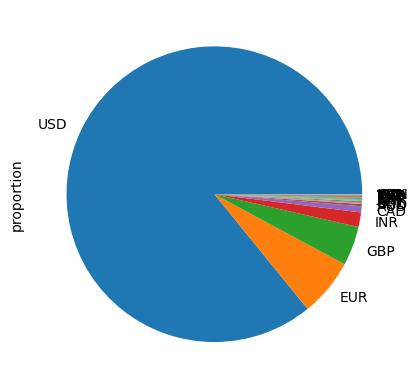

In [115]:
df['salary_currency'].value_counts(normalize=True).plot(kind='pie') #   Can't read this too well
df['salary_currency'].value_counts(normalize='True')


C:\Users\Yousef\AppData\Local\Temp\ipykernel_15544\3237553916.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currencies.loc[~mask] = 'Others'


Text(0.5, 1.0, 'The following plot are the currencies used in the Data Science field')

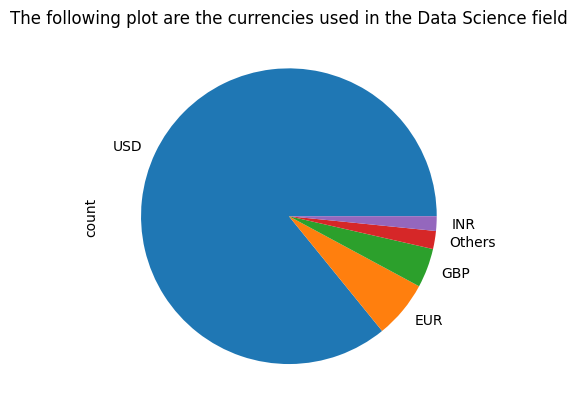

In [116]:
currencies = df['salary_currency']
currencies.value_counts(normalize='True')
allowed = ['USD', 'EUR', 'GBP', 'INR']

mask = currencies.isin(allowed)
currencies.loc[~mask] = 'Others'
currencies.value_counts().plot(kind='pie')
plt.title("The following plot are the currencies used in the Data Science field")

Text(0, 0.5, 'Count')

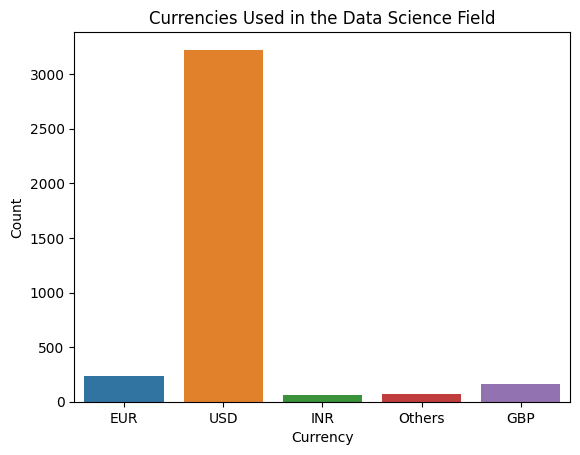

In [117]:
sns.countplot(data=df, x=currencies)
plt.title("Currencies Used in the Data Science Field")
plt.xlabel("Currency")
plt.ylabel("Count")

<h2>What is the salary range in USD for data scientists in the dataset?</h2>

In [118]:
'The salary range for a data scientist is '+ str(data['salary_in_usd'].max() - data['salary_in_usd'].min())

'The salary range for a data scientist is 406321'

<h2> What is the geographical distribution of data scientists' residence? </h2>

In [119]:
df['employee_residence'].value_counts(normalize=True)

employee_residence
US    0.800000
GB    0.044474
CA    0.022636
ES    0.021305
IN    0.018908
        ...   
BA    0.000266
AM    0.000266
CY    0.000266
KW    0.000266
MT    0.000266
Name: proportion, Length: 78, dtype: float64

<h2>Based on title, what job has the highest salary?</h2>

<Axes: xlabel='job_title'>

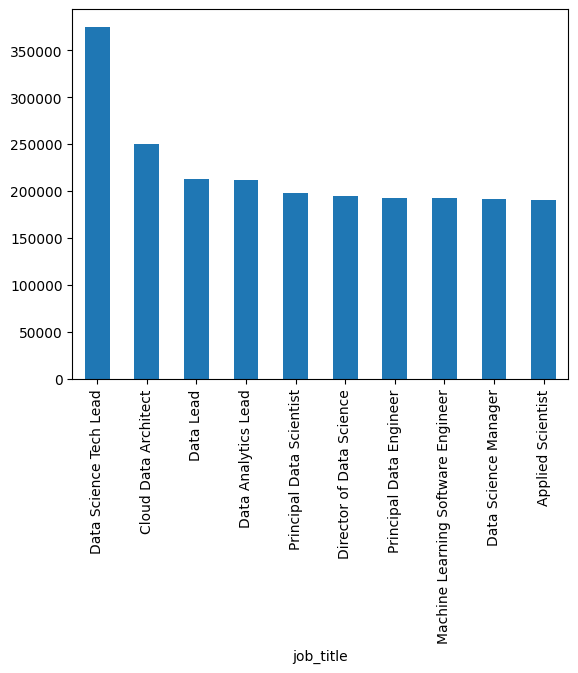

In [120]:
groups = df.groupby('job_title')['salary_in_usd']
all_jobs = groups.mean().sort_values().nlargest(10)
all_jobs.plot(kind='bar')


<h2>The distribution of job titles in analysis fields</h2>

<Axes: ylabel='proportion'>

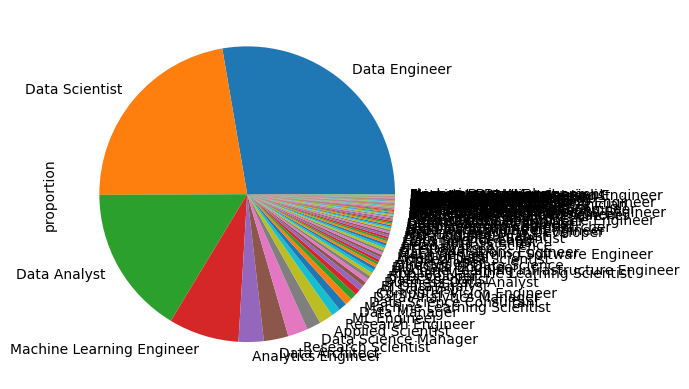

In [121]:
titles = df['job_title']
titles.value_counts(normalize=True).plot(kind='pie')

C:\Users\Yousef\AppData\Local\Temp\ipykernel_15544\1090317301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles.loc[~mask] = 'Others'


Text(0.5, 1.0, 'The titles of data scientist')

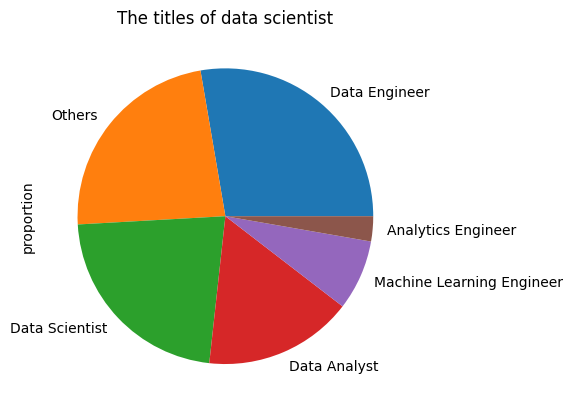

In [122]:
allowed = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Analytics Engineer']
mask = titles.isin(allowed)
titles.loc[~mask] = 'Others'
titles.value_counts(normalize=True).plot(kind='pie')

plt.title('The titles of data scientist')

<h2>

<h2> How does the size of a company effect the average salary? </h2>

<Axes: xlabel='company_size'>

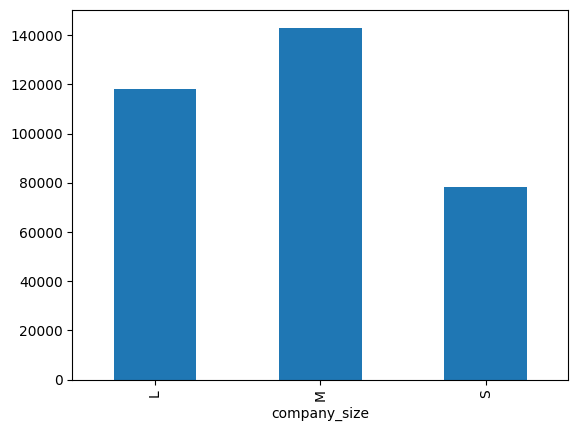

In [123]:
groups =df.groupby('company_size')['salary_in_usd']
all = groups.mean()
all.plot(kind='bar')

In [124]:
titles = ['Small', 'Medium', 'Large']

<BarContainer object of 3 artists>

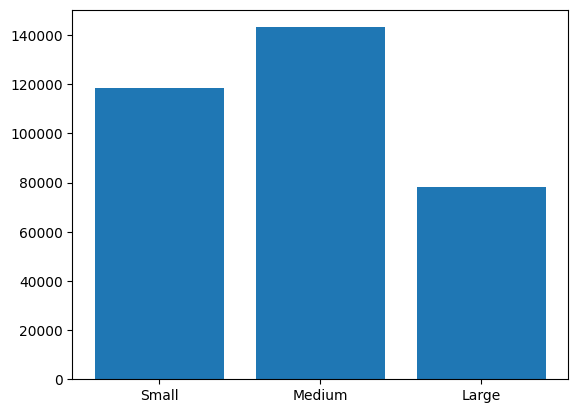

In [125]:
plt.bar(x=titles, height= all)


<Axes: xlabel='company_size', ylabel='salary_in_usd'>

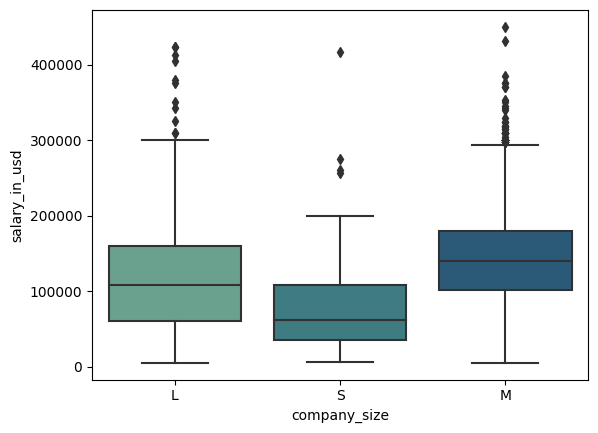

In [127]:
sns.boxplot(x='company_size', y='salary_in_usd', data=df,palette='crest')